# Phase Portraits
This notebook shows several ways to visualize information in $\mathbb R^2$. To this end, consider the simple pendulum
\begin{equation}
\begin{bmatrix}\dot x_1\\ \dot x_2 \end{bmatrix}=\begin{bmatrix} x_2\\ -\frac gL \sin(x_1) - \frac{c}{mL^2} x_2\end{bmatrix},
\end{equation}
where $g$ is the acceleration of gravity, $L$ is the lenght of the pendulum, $c$ is the dynamic friction coefficient, and $m$ is the mass of the pendulum. 

In [23]:
% Model Parameters
g = 9.81; L = 2; c = 1e2; m = 40;

% System
f = @(t,x) [x(2)
            -g/L*sin(x(1))-c/(m*L^2)*x(2)];

## Solve ODE
Given a time interval `T` and an initial condition `x0`, the system can be solved using `ode45`. 

In [24]:
% Time interval
T = [0,20];

% Initial Conditions
x0 = [0;5];

% Solve ODE
[t,x]=ode45(f,T,x0,odeset('RelTol',1e-4));

### Visualize as a Collection of Signals
The solution $x(t)$ can be visualized in the time domain by plotting $t$ on the x-axis and each individual element $x_i(t)$ on a separate y-axis. This approach is very general and redily scales beyond the case $x\in\mathbb R^2$.

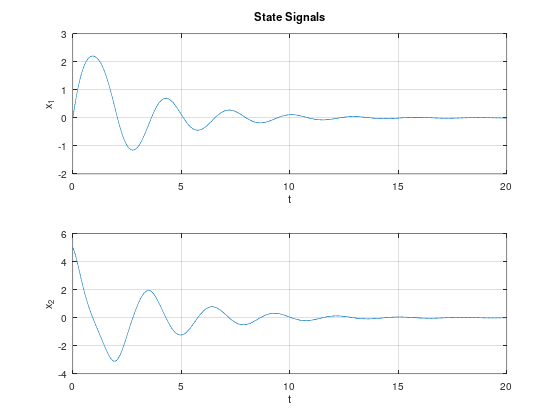

In [25]:
% Plot Signals x1(t) and x2(t)
subplot(2,1,1)
plot(t,x(:,1)); grid on
xlabel('t'); ylabel('x_1')
title('State Signals')

subplot(2,1,2)
plot(t,x(:,2)); grid on
xlabel('t'); ylabel('x_2')

### Visualize as a Trajectory
The solution $x(t)$ can be visualized in the _Phase Plane_ by plotting $x_1(t)$ on the x-axis and $x_2(t)$ on the y-axis. This approach can be extended to $x\in\mathbb R^3$ using the `plot3` function. However, visualizing trajectories in $\mathbb R^n$ becomes impossible for $n>3$.

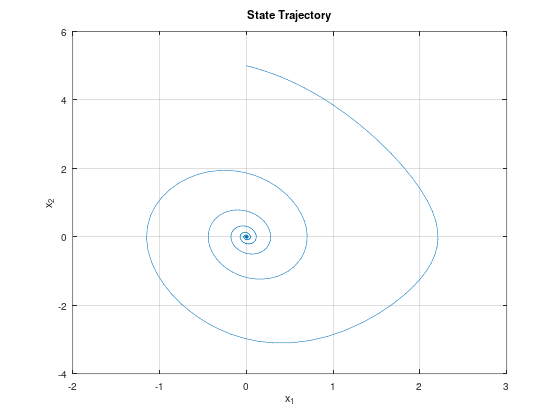

In [26]:
% Plot Trajectory
plot(x(:,1),x(:,2)); grid on
xlabel('x_1'); ylabel('x_2')
title('State Trajectory')

## Plot Vector Field
Rather than solving the ODE, it may be interesting to plot the autonomous system as a vector field $f:\mathbb R^2\to\mathbb R^2$. To this end, it is necessary to create a grid of coordinates $(x_1,x_2)$ and evaluate the individual components $f_1(x)$ and $f_2(x)$ at each of those coordinates.

For this particular plot, we consider a grid of $31$ equally distributed points in the range $x_1\in[-\pi,\pi]$ and $31$ equally distributed points in the range $x_2\in[-5,5]$.

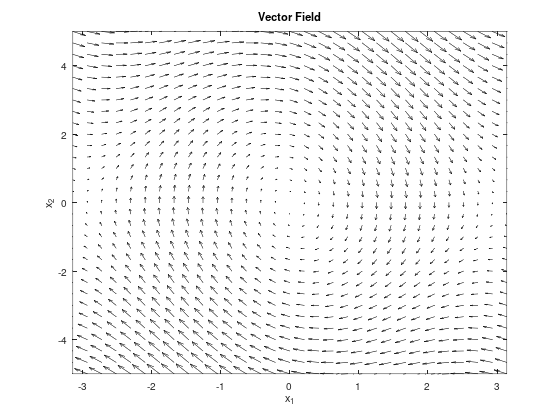

In [27]:
% Create Grid
[X1,X2]=meshgrid(linspace(-pi,pi,31),linspace(-5,5,31));

% Compute f1 and f2 on Grid
F1 = X2;
F2 = -g/L*sin(X1)-c/(m*L^2)*X2;

% Plot Vector Field
quiver(X1,X2,F1,F2,'k');
axis([X1(1) X1(end) X2(1) X2(end)]);
xlabel('x_1'); ylabel('x_2')
title('Vector Field')

Superimposing the vector field $f(x)$ with the trajectory of the ODE $\dot x=f(x)$ clearly shows that the trajectory $x(t)$ flows along the vector field.

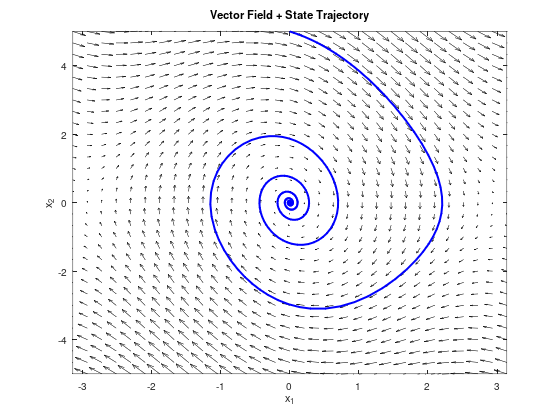

In [28]:
% Plot Vector Field and Trajectory
quiver(X1,X2,F1,F2,'k'); hold on
plot(x(:,1),x(:,2),'b','LineWidth',2);
axis([X1(1) X1(end) X2(1) X2(end)]);
xlabel('x_1'); ylabel('x_2')
title('Vector Field + State Trajectory')

## Plot Multiple Trajectories
To plot multiple trajectories, the most intuitive way is to implement a `for` loop that iterates over multiple initial conditions.

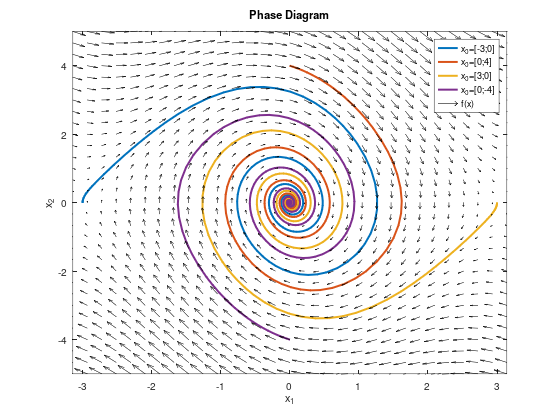

In [29]:
% Set of initial conditions x0 = [-3;0], x0 = [0;4], x0 = [3;0], x0 = [0;-4]
X0 = [-3 0; 0 4; 3 0; 0 -4]';

for x0 = X0
    % Solve ODE
    [t,x]=ode45(f,T,x0,odeset('RelTol',1e-4));

    % Plot Trajectory
    plot(x(:,1),x(:,2),'LineWidth',2,'DisplayName',['x_0=[' num2str(x0(1)) ';' num2str(x0(2)) ']']); hold on
end

% Plot Vector Field
quiver(X1,X2,F1,F2,'k','DisplayName','f(x)');
xlabel('x_1'); ylabel('x_2');
axis([X1(1) X1(end) X2(1) X2(end)]);
legend; title('Phase Diagram')


Similar results can also be obtained using the `streamline` function, which uses the vector field information instead of calling `ode45`.

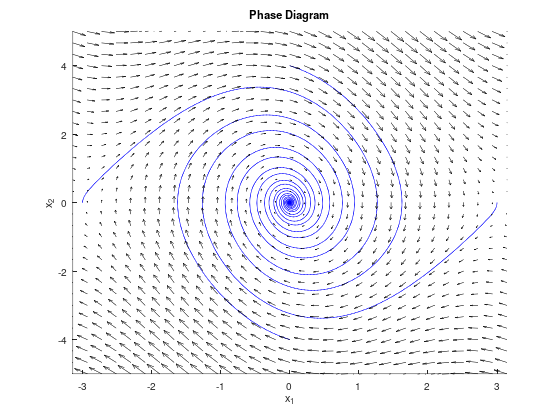

In [30]:
% Plot Streamlines
streamline(X1,X2,F1,F2,X0(1,:),X0(2,:)); hold on

% Plot Vector Field
quiver(X1,X2,F1,F2,'k','DisplayName','f(x)');
xlabel('x_1'); ylabel('x_2');
axis([X1(1) X1(end) X2(1) X2(end)]);
title('Phase Diagram')

## Plot Level-Sets
In addition to the vector field, it may be interesing to plot the level-sets of a function $V:\mathbb R^2\to\mathbb R$. For example, consider the function
\begin{equation}
V(x) = mgL(1-\cos(x_1)+\frac12mL^2x_2^2,
\end{equation}
which is the total (potential + kinetic) energy of the pendulum. Its level-sets can be plotted by evaluating `V` in each point of the grid (note the use of the element-wise operator `.^`), and using the `contour` function.

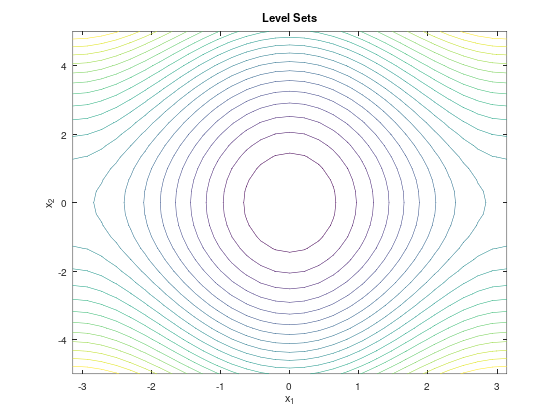

In [31]:
% Compute Total Energy
V = m*g*L*(1-cos(X1))+1/2*m*L^2*X2.^2;

% Plot 20 Level Sets
contour(X1,X2,V,20)
xlabel('x_1'); ylabel('x_2')
title('Level Sets')

As before, it is possible to combine different plots, e.g. level sets and vector field, into a single figure

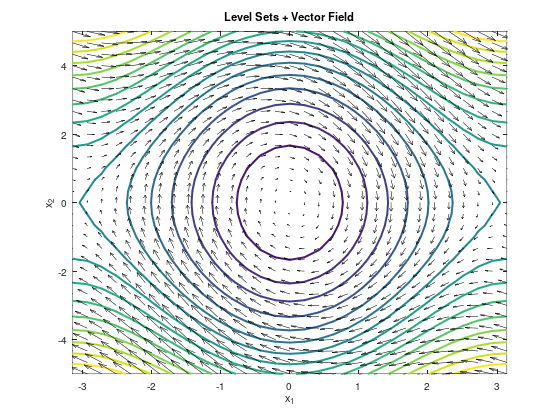

In [32]:
% Plot Level Sets and Vector Field
contour(X1,X2,V,15,'LineWidth',2); hold on
quiver(X1,X2,F1,F2,1.25,'k')
axis([X1(1) X1(end) X2(1) X2(end)])
xlabel('x_1'); ylabel('x_2')
title('Level Sets + Vector Field')

### Plot Specific Level Sets
Unfortunately, combined plots can become difficult to interpret when they are too busy. To show the invariance of a specific sublevel-set, e.g.
\begin{equation}
\mathcal S = \left\{x\in(-\pi,\pi)\times\mathbb R~\left|~V(x)\leq \frac74mgL\right.\right\},
\end{equation}
it is possible to have the `contour` function output the set boundary $\partial \mathcal S$ and then plot the vector field only for $x\in\partial\mathcal S$.

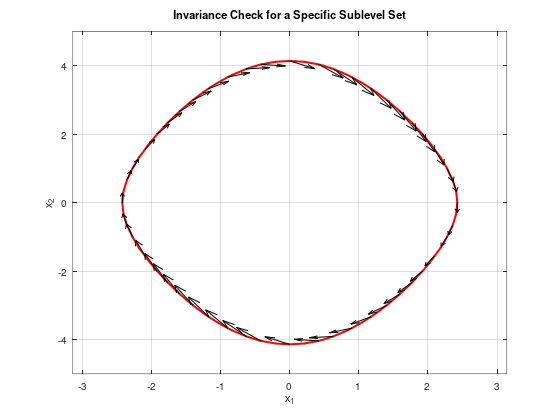

In [33]:
% Plot a specific level-set and obtain its coordinates
dS = contour(X1,X2,V,7/4*m*g*L*[1 1],'r','LineWidth',2); hold on
X1s = dS(1,1:2:end);
X2s = dS(2,1:2:end);

% Compute f1 and f2 on those coordinates
F1s = X2s;
F2s = -g/L*sin(X1s)-c/(m*L^2)*X2s;

% Plot Vector Field
quiver(X1s,X2s,F1s,F2s,1/20,'k','LineWidth',1); grid on
xlabel('x_1'); ylabel('x_2')
title('Invariance Check for a Specific Sublevel Set')

The figure shows that the vector field $f(x)$ is always pointing inside, or tangent to, the set boundary $\partial\mathcal S$. This provides a graphical confirmation that the sublevel set $\mathcal S$ is forward invariant. The physical interpretation is that the energy of the pendulum cannot increase on its own.

## Periodic Orbits
To see a periodic behavior using a simple pendulum model, it is sufficient to set the dynamic friction term to zero and choose a suitable initial conditon, e.g. $x_0=[\frac34\pi;0]$.

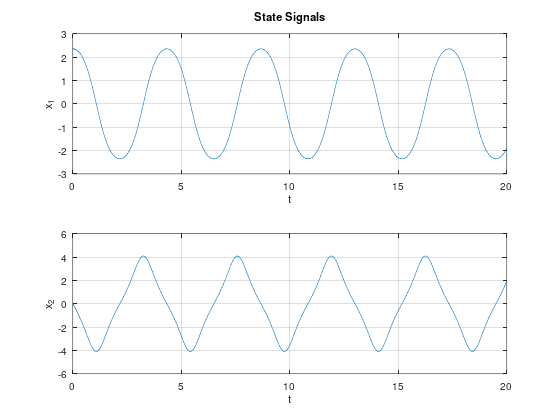

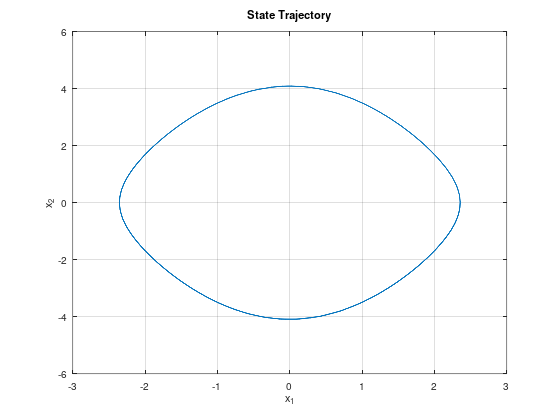

In [34]:
% Change Friction Parameter
c = 0;

% Redefine Model
f = @(t,x) [x(2)
            -g/L*sin(x(1))-c/(m*L^2)*x(2)];

% Solve ODE
x0 = [3/4*pi;0];
[t,x]=ode45(f,T,x0,odeset('RelTol',1e-4));

% Plot Signals x1(t) and x2(t)
subplot(2,1,1)
plot(t,x(:,1)); grid on
xlabel('t'); ylabel('x_1')
title('State Signals')

subplot(2,1,2)
plot(t,x(:,2)); grid on
xlabel('t'); ylabel('x_2')

% Plot Trajectory
figure
plot(x(:,1),x(:,2)); grid on
xlabel('x_1'); ylabel('x_2')
title('State Trajectory')

We can overlap this periodic orbit with the vector field and, perhaps more interestingly, with the energy level-sets.

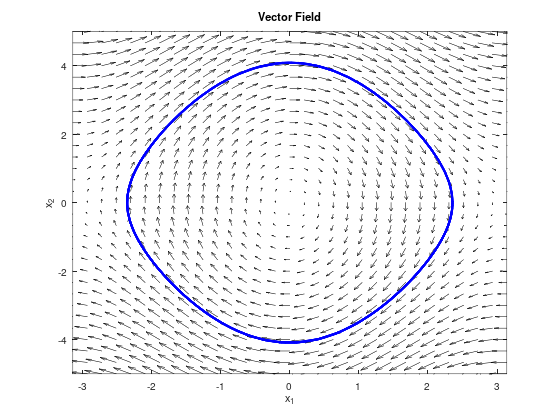

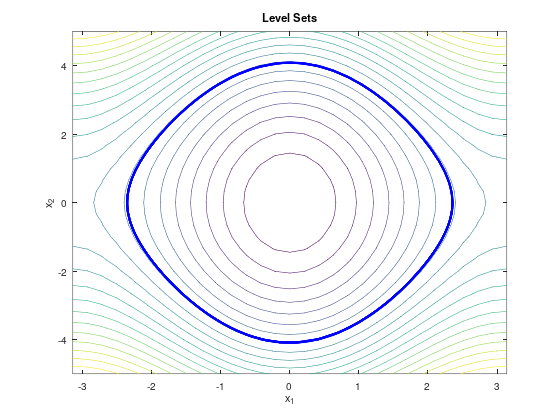

In [35]:
% Compute f1 and f2 on Grid
F1 = X2;
F2 = -g/L*sin(X1)-c/(m*L^2)*X2;

% Plot Vector Field + Trajectory
quiver(X1,X2,F1,F2,'k'); hold on
plot(x(:,1),x(:,2),'b','LineWidth',2);
axis([X1(1) X1(end) X2(1) X2(end)]);
xlabel('x_1'); ylabel('x_2')
title('Vector Field')

% Compute Total Energy
V = m*g*L*(1-cos(X1))+1/2*m*L^2*X2.^2;

% Plot Energy Level Sets + Trajectory
figure
contour(X1,X2,V,20); hold on
plot(x(:,1),x(:,2),'b','LineWidth',2);
xlabel('x_1'); ylabel('x_2')
title('Level Sets')

Here, we see that the periodic orbit of the system matches one of the energy level sets. Indeed, in the absence of friction, the pendulum oscillates by continuously tranferring kinetic energy into potential energy and vice-versa. This behavior is true for any initial condition such that the energy is less than $2mgL$ (i.e. the energy required to put the pendulum in its upright position). To show this, we can once again take the previously defined energy sublevel set $\mathcal S$ and plot the vector field $f(x)$ for all points $x\in\partial\mathcal S$.

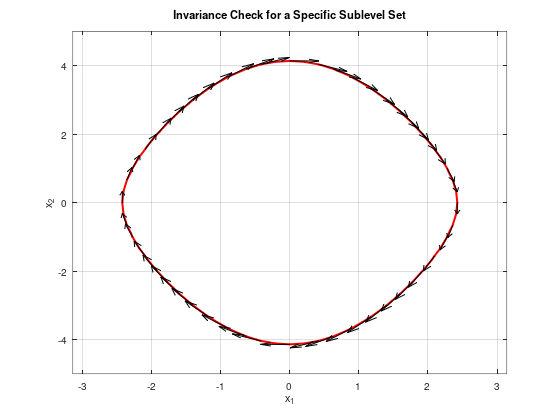

In [36]:
% Plot a specific level-set and obtain its coordinates
dS = contour(X1,X2,V,7/4*m*g*L*[1 1],'r','LineWidth',2); hold on
X1s = dS(1,1:2:end);
X2s = dS(2,1:2:end);

% Compute f1 and f2 on those coordinates
F1s = X2s;
F2s = -g/L*sin(X1s)-c/(m*L^2)*X2s;

% Plot Vector Field
quiver(X1s,X2s,F1s,F2s,1/20,'k','LineWidth',1); grid on
xlabel('x_1'); ylabel('x_2')
title('Invariance Check for a Specific Sublevel Set')

The figure shows that the vector field $f(x)$ is always tangent to the set boundary $\partial\mathcal S$. As such, the energy of the pedulum is neither decreasing nor increasing. This provides a graphical confirmation that the level set $\partial\mathcal S$ is invariant. Since $\partial S$ is a closed curve with no equilibrium points, it is necessarily a periodic orbit.